In [55]:
!pip install tensorflow opencv-python matplotlib

In [56]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.3.1
anyio                     4.10.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.5
bleach                    6.2.0
certifi                   2025.8.3
cffi                      2.0.0
charset-normalizer        3.4.3
colorama                  0.4.6
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.16
decorator                 5.2.1
defusedxml                0.7.1
et_xmlfile                2.0.0
executing                 2.2.1
fastjsonschema            2.21.2
flatbuffers               25.2.10
fonttools                 4.59.1
fqdn                      1.5.1
gast          

In [57]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [58]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [59]:
import cv2


In [60]:
!pip install Pillow

In [61]:
data_dir='DATASET'

In [62]:
image_exts=['jpeg','jpg','bmp','png']

In [63]:
os.listdir(data_dir)

['healthy', 'moderately_unhealthy', 'unhealthy']

In [64]:
import numpy as np
from matplotlib import pyplot as plt

In [65]:
from pathlib import Path

for path in Path("data").rglob("*"):
    if path.is_file():
        new_path = path.with_suffix(path.suffix.lower())
        if path.suffix != new_path.suffix:
            path.rename(new_path)


In [66]:
data=tf.keras.utils.image_dataset_from_directory('DATASET')


Found 6631 files belonging to 3 classes.


In [67]:
class_names = data.class_names
print("Classes:", class_names, "Count:", len(class_names))

Classes: ['healthy', 'moderately_unhealthy', 'unhealthy'] Count: 3


In [68]:
data_iterator=data.as_numpy_iterator()


In [69]:
batch=data_iterator.next()


In [70]:
batch

(array([[[[210.      , 193.      , 163.      ],
          [208.33984 , 191.33984 , 161.33984 ],
          [208.7168  , 188.84961 , 159.5664  ],
          ...,
          [159.7168  , 173.2832  , 204.4336  ],
          [159.16992 , 174.16992 , 203.16992 ],
          [160.      , 175.      , 204.      ]],
 
         [[210.      , 193.      , 163.      ],
          [208.33984 , 191.33984 , 161.33984 ],
          [208.1218  , 188.25461 , 158.9714  ],
          ...,
          [159.95187 , 174.11328 , 203.47868 ],
          [160.14105 , 175.      , 204.      ],
          [161.66016 , 175.83008 , 204.83008 ]],
 
         [[209.2832  , 192.2832  , 163.7168  ],
          [207.02805 , 190.02805 , 161.46164 ],
          [206.5664  , 186.69922 , 157.82202 ],
          ...,
          [161.23059 , 173.76941 , 201.84961 ],
          [161.17844 , 175.04813 , 202.73633 ],
          [163.4336  , 175.2832  , 203.5664  ]],
 
         ...,
 
         [[ 29.84961 ,  63.84961 ,  13.849609],
          [ 28.894

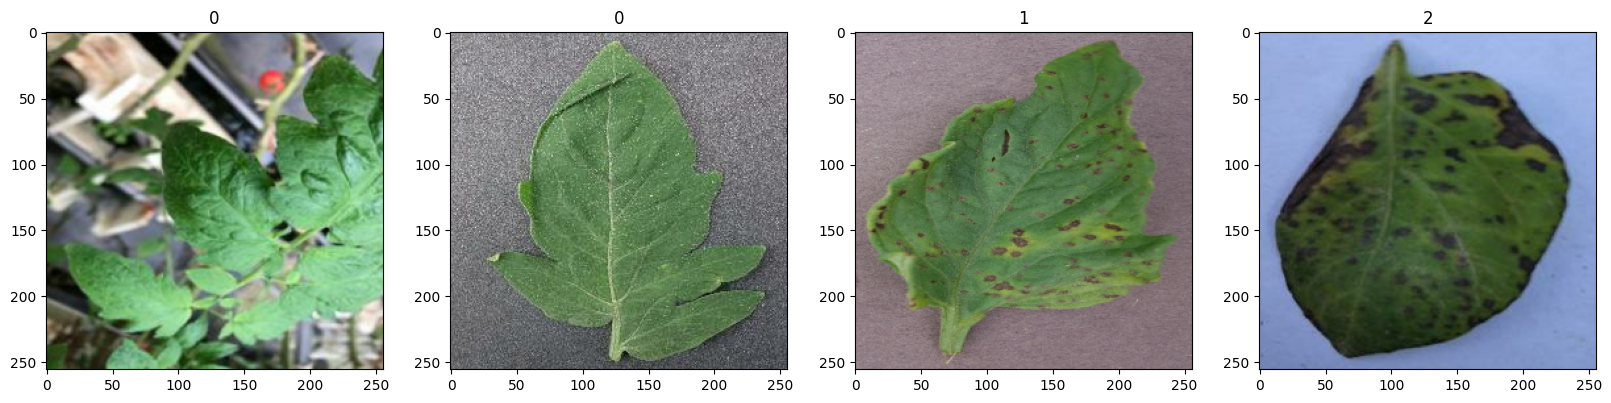

In [71]:
fig,ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [72]:
batch[0]

array([[[[210.      , 193.      , 163.      ],
         [208.33984 , 191.33984 , 161.33984 ],
         [208.7168  , 188.84961 , 159.5664  ],
         ...,
         [159.7168  , 173.2832  , 204.4336  ],
         [159.16992 , 174.16992 , 203.16992 ],
         [160.      , 175.      , 204.      ]],

        [[210.      , 193.      , 163.      ],
         [208.33984 , 191.33984 , 161.33984 ],
         [208.1218  , 188.25461 , 158.9714  ],
         ...,
         [159.95187 , 174.11328 , 203.47868 ],
         [160.14105 , 175.      , 204.      ],
         [161.66016 , 175.83008 , 204.83008 ]],

        [[209.2832  , 192.2832  , 163.7168  ],
         [207.02805 , 190.02805 , 161.46164 ],
         [206.5664  , 186.69922 , 157.82202 ],
         ...,
         [161.23059 , 173.76941 , 201.84961 ],
         [161.17844 , 175.04813 , 202.73633 ],
         [163.4336  , 175.2832  , 203.5664  ]],

        ...,

        [[ 29.84961 ,  63.84961 ,  13.849609],
         [ 28.894695,  64.67969 ,  13.254612]

In [73]:

data=data.map(lambda x,y: (x/255,y))


In [74]:
scaled_iterator=data.as_numpy_iterator()

In [75]:
batch=scaled_iterator.next()

In [76]:
batch[0].max()

np.float32(1.0)

In [77]:
len(data)

208

In [78]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [79]:
train_size+val_size+test_size

208

In [80]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [81]:
len(train)

145

In [82]:
!pip install tensorflow

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [84]:
model=Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))







c:\Users\Sneha\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [86]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [88]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 40s 261ms/step - accuracy: 0.7616 - loss: 0.5627 - val_accuracy: 0.8237 - val_loss: 0.4535
Epoch 2/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 38s 258ms/step - accuracy: 0.8433 - loss: 0.4009 - val_accuracy: 0.8058 - val_loss: 0.4167
Epoch 3/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 38s 258ms/step - accuracy: 0.8543 - loss: 0.3454 - val_accuracy: 0.8557 - val_loss: 0.3631
Epoch 4/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 38s 259ms/step - accuracy: 0.8886 - loss: 0.2795 - val_accuracy: 0.8415 - val_loss: 0.4023
Epoch 5/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 38s 259ms/step - accuracy: 0.9075 - loss: 0.2378 - val_accuracy: 0.8579 - val_loss: 0.4131
Epoch 6/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 38s 258ms/step - accuracy: 0.9334 - loss: 0.1752 - val_accuracy: 0.8698 - val_loss: 0.3978
Epoch 7/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 38s 260ms/step - accuracy: 0.9522 - loss: 0.1337 - val_accuracy: 0.8787 - val_loss: 0.3983
Epoch 8/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 3390s 24s/step - accuracy: 0.9422 - loss: 0

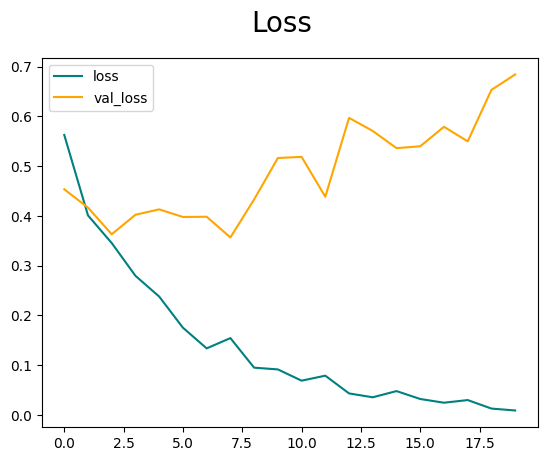

In [89]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [118]:

from sklearn.metrics import classification_report

y_true = []
y_pred = []

for X, y in test:
    preds = model.predict(X)
    y_true.extend(y.numpy())                         # true labels
    y_pred.extend(np.argmax(preds, axis=1))          # predicted class index

print(classification_report(y_true, y_pred, target_names=class_names))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
                      precision    recall  f1-score   support

             healthy       0.95      0.97      0.96       383
moderately_unhealthy       0.75      0.77      0.76      

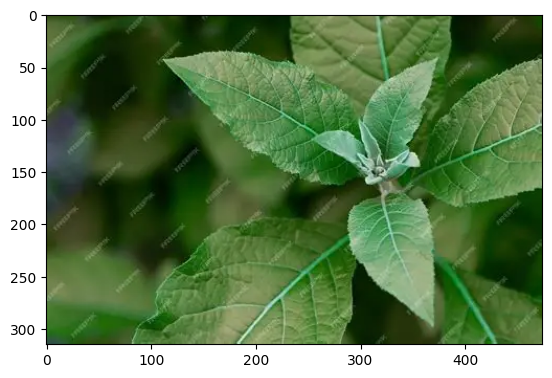

In [169]:

img=cv2.imread('test2.jpg')
plt.imshow(img)
plt.show()

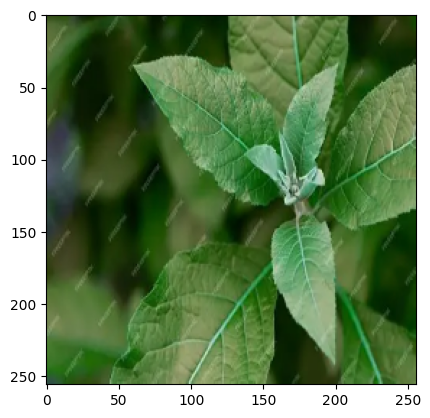

In [170]:
resize=tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [171]:

yhat=model.predict(np.expand_dims(resize/255,0))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [172]:
yhat

array([[9.9999917e-01, 1.9643063e-12, 8.7325583e-07]], dtype=float32)

In [ ]:

class_names = ['Healthy', 'Moderately Healthy', 'Unhealthy']

def predict_class_from_first_digit(yhat, class_names):
    first_row = yhat[0]
    first_digits = []

    for val in first_row:
        s = "{:.6e}".format(val) 
        for char in s:
            if char.isdigit() and char != '0':
                first_digits.append(int(char))
                break
        else:
            first_digits.append(0) 
    pred_index = np.argmax(first_digits)
    return class_names[pred_index]
predicted_class = predict_class_from_first_digit(yhat, class_names)
print(predicted_class)


Healthy


In [174]:


from tensorflow.keras.models import load_model
model.save(os.path.join('models','infectionclassifier.h5'))
new_model=load_model(os.path.join('models','infectionclassifier.h5'))
yhatnew=new_model.predict(np.expand_dims(resize/255,0))
class_names = ['Healthy', 'Moderately Healthy', 'Unhealthy']

def predict_class_from_first_digit(yhat, class_names):
    first_row = yhat[0]
    first_digits = []

    for val in first_row:
        s = "{:.6e}".format(val) 
        for char in s:
            if char.isdigit() and char != '0':
                first_digits.append(int(char))
                break
        else:
            first_digits.append(0) 
    pred_index = np.argmax(first_digits)
    return class_names[pred_index]
predicted_class = predict_class_from_first_digit(yhat, class_names)
print(predicted_class)









1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Healthy
